In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

data = {
    'price': ['low', 'low', 'low', 'low', 'med', 'med', 'med', 'med', 'high', 'high', 'high', 'high'],
    'maintenance': ['low', 'med', 'low', 'high', 'med', 'med', 'high', 'high', 'med', 'high', 'high', 'high'],
    'capacity': [2, 4, 4, 4, 4, 4, 2, 5, 4, 2, 4, 5],
    'airbag': ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes'],
    'profitable': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes']
}

df = pd.DataFrame(data)

In [3]:
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

X = df.drop('profitable', axis=1)
y = df['profitable']

In [4]:
X

,price,maintenance,capacity,airbag
0,1,1,0,0
1,1,2,1,1
2,1,1,1,0
3,1,0,1,0
4,2,2,1,0
5,2,2,1,1
6,2,0,0,1
7,2,0,2,0
8,0,2,1,1
9,0,0,0,1


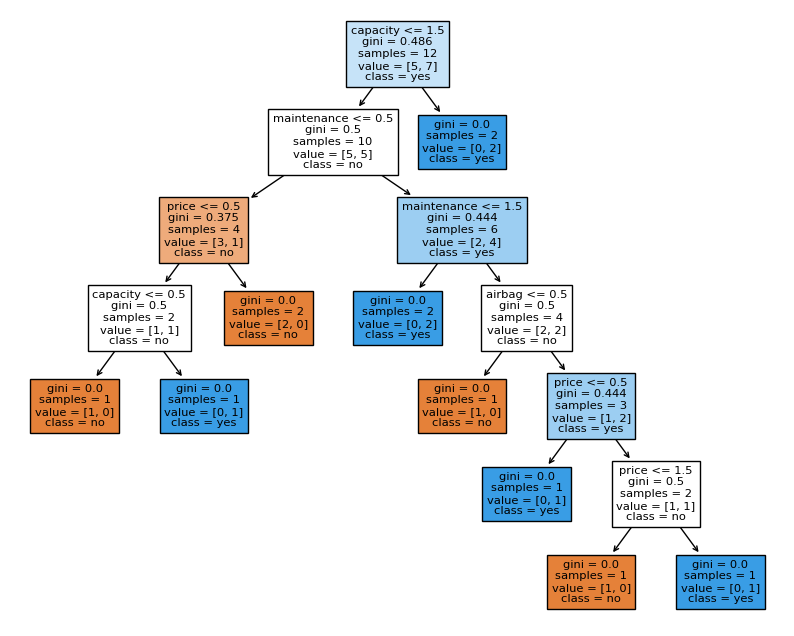

In [5]:
clf = DecisionTreeClassifier(criterion='gini')  # Gini Impurity
clf = clf.fit(X, y)

plt.figure(figsize=(10,8))
tree.plot_tree(clf, feature_names=['price', 'maintenance', 'capacity', 'airbag'], class_names=['no', 'yes'], filled=True)
plt.show()

In [28]:
# Predicting the class labels for the training data
y_pred = clf.predict(X)

# Calculating the accuracy of the model
accuracy = (y == y_pred).mean() * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 100.00%


# manual approach

In [7]:
import pandas as pd
import numpy as np

# Step 1: Define a function to calculate the Gini Impurity
def gini_impurity(data):
    """Calculate the Gini Impurity of a dataset based on the 'profitable' column."""
    total = len(data)
    if total == 0:
        return 0
    counts = data['profitable'].value_counts()
    probabilities = counts / total
    gini = 1 - np.sum(np.square(probabilities))
    return gini

# Step 2: Define a function to calculate the weighted Gini Impurity for a split
def weighted_gini(groups, total_samples):
    """Calculate the weighted Gini Impurity for a split."""
    weighted_gini_value = 0.0
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        gini = gini_impurity(group)
        weighted_gini_value += (size / total_samples) * gini
    return weighted_gini_value

# Step 3: Function to split dataset based on an attribute and its value
def split_dataset(data, attribute):
    """Split the dataset into subgroups based on the unique values of an attribute."""
    unique_values = data[attribute].unique()
    splits = []
    for value in unique_values:
        subgroup = data[data[attribute] == value]
        splits.append(subgroup)
    return splits

# Step 4: Find the best attribute to split on and print Gini values
def best_split(data, attributes):
    """Find the best attribute to split on based on Gini Impurity."""
    total_samples = len(data)
    best_gini = float('inf')
    best_attribute = None
    best_splits = None
    
    print("\nCalculating Gini for each attribute...")
    for attribute in attributes:
        splits = split_dataset(data, attribute)
        gini = weighted_gini(splits, total_samples)
        print(f"Gini for splitting by {attribute}: {gini:.4f}")
        
        if gini < best_gini:
            best_gini = gini
            best_attribute = attribute
            best_splits = splits

    print(f"Best attribute to split on: {best_attribute}, Gini: {best_gini:.4f}\n")
    return best_attribute, best_splits, best_gini

# Step 5: Recursively create the decision tree and print intermediate steps
def create_decision_tree(data, attributes, depth=0):
    """Recursively build the decision tree."""
    # Base case: if all instances have the same label, return that label
    if len(data['profitable'].unique()) == 1:
        return data['profitable'].iloc[0]

    # If no attributes left to split, return the majority class
    if len(attributes) == 0:
        return data['profitable'].mode()[0]
    
    # Choose the best attribute to split
    best_attribute, best_splits, _ = best_split(data, attributes)
    
    # Remove the best attribute from the list
    attributes = [attr for attr in attributes if attr != best_attribute]
    
    # Create a subtree for each split
    tree = {best_attribute: {}}
    for split_data in best_splits:
        value = split_data[best_attribute].iloc[0]
        print(f"Splitting on {best_attribute} = {value}, Depth = {depth + 1}")
        subtree = create_decision_tree(split_data, attributes, depth + 1)
        tree[best_attribute][value] = subtree

    return tree

# Step 6: Function to predict the outcome for a single sample using the decision tree
def predict(tree, sample):
    """Predict the class label for a single sample."""
    if not isinstance(tree, dict):
        return tree
    attribute = list(tree.keys())[0]
    value = sample[attribute]
    subtree = tree[attribute].get(value, None)
    if subtree is None:
        return None  # If value is not present in the tree
    return predict(subtree, sample)

# Step 7: Evaluate the decision tree's accuracy on the training data
def evaluate_accuracy(tree, data):
    """Evaluate the accuracy of the decision tree on the dataset."""
    correct_predictions = 0
    for i, row in data.iterrows():
        prediction = predict(tree, row)
        if prediction == row['profitable']:
            correct_predictions += 1
    accuracy = correct_predictions / len(data) * 100
    return accuracy

# Step 8: Input dataset (from the question)
data = pd.DataFrame({
    'price': ['low', 'low', 'low', 'low', 'med', 'med', 'med', 'med', 'high', 'high', 'high', 'high'],
    'maintenance': ['low', 'med', 'low', 'high', 'med', 'med', 'high', 'high', 'med', 'high', 'high', 'high'],
    'capacity': [2, 4, 4, 4, 4, 4, 2, 5, 4, 2, 4, 5],
    'airbag': ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes'],
    'profitable': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes']
})

# List of attributes for splitting
attributes = ['price', 'maintenance', 'capacity', 'airbag']

# Step 9: Build the decision tree
decision_tree = create_decision_tree(data, attributes)

# Output the constructed decision tree
print("Final Decision Tree:", decision_tree)

# Step 10: Evaluate accuracy of the decision tree on the training data
accuracy = evaluate_accuracy(decision_tree, data)
print(f"Accuracy on training data: {accuracy:.2f}%")



Calculating Gini for each attribute...
Gini for splitting by price: 0.4583
Gini for splitting by maintenance: 0.4167
Gini for splitting by capacity: 0.3968
Gini for splitting by airbag: 0.4857
Best attribute to split on: capacity, Gini: 0.3968

Splitting on capacity = 2, Depth = 1

Calculating Gini for each attribute...
Gini for splitting by price: 0.0000
Gini for splitting by maintenance: 0.0000
Gini for splitting by airbag: 0.0000
Best attribute to split on: price, Gini: 0.0000

Splitting on price = low, Depth = 2
Splitting on price = med, Depth = 2
Splitting on price = high, Depth = 2
Splitting on capacity = 4, Depth = 1

Calculating Gini for each attribute...
Gini for splitting by price: 0.3333
Gini for splitting by maintenance: 0.4286
Gini for splitting by airbag: 0.4048
Best attribute to split on: price, Gini: 0.3333

Splitting on price = low, Depth = 2

Calculating Gini for each attribute...
Gini for splitting by maintenance: 0.0000
Gini for splitting by airbag: 0.3333
Best att

In [9]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [13]:
import graphviz

def visualize_decision_tree(tree, node_id=0):
    dot = graphviz.Digraph()
    dot.attr(rankdir='TB')

    def add_nodes_edges(tree, parent_id=None):
        nonlocal node_id
        if isinstance(tree, dict):
            attribute = list(tree.keys())[0]
            node_id += 1
            current_id = node_id
            dot.node(str(current_id), attribute, shape='rectangle')
            if parent_id is not None:
                dot.edge(str(parent_id), str(current_id))
            for value, subtree in tree[attribute].items():
                child_id = add_nodes_edges(subtree, current_id)
                dot.edge(str(current_id), str(child_id), label=str(value))
        else:
            node_id += 1
            dot.node(str(node_id), str(tree), shape='ellipse')
            if parent_id is not None:
                dot.edge(str(parent_id), str(node_id))
            return node_id
        return current_id

    add_nodes_edges(tree)
    return dot

# The decision tree structure
tree = {
    'capacity': {
        2: {'price': {'low': 'yes', 'med': 'no', 'high': 'no'}},
        4: {'airbag': {'no': {'maintenance': {'med': 'no', 'low': 'yes', 'high': 'no'}}, 'yes': 'yes'}},
        5: 'yes'
    }
}

# Generate the visualization
dot = visualize_decision_tree(tree)

# Render the graph
dot.render('decision_tree', format='png', cleanup=True)
print("Decision tree visualization has been saved as 'decision_tree.png'")

Decision tree visualization has been saved as 'decision_tree.png'


In [11]:
from graphviz import Digraph
def visualize_tree(tree, dot=None, parent=None, label=None):
    if dot is None:
        dot = Digraph()
    
    # Base case: if the tree is a leaf node
    if not isinstance(tree, dict):
        dot.node(str(id(tree)), label=f"Class: {tree}")
        if parent is not None:
            dot.edge(parent, str(id(tree)), label=label)
        return dot

    # If it's a decision node, label it with the attribute
    attribute = list(tree.keys())[0]
    dot.node(str(id(tree)), label=attribute)
    
    if parent is not None:
        dot.edge(parent, str(id(tree)), label=label)
    
    # Recursively visualize the subtree
    for value, subtree in tree[attribute].items():
        visualize_tree(subtree, dot, str(id(tree)), label=str(value))
    
    return dot

In [12]:
# Step 9: Visualize the decision tree using graphviz
dot = visualize_tree(decision_tree)
dot.render("decision_tree", format="png", view=True)


'decision_tree.png'

In [1]:
import pandas as pd
import numpy as np

def gini_impurity(data):
    """Calculate the Gini Impurity of a dataset based on the 'profitable' column."""
    total = len(data)
    if total == 0:
        return 0
    counts = data['profitable'].value_counts()
    probabilities = counts / total
    gini = 1 - np.sum(np.square(probabilities))
    print(f"  Gini Impurity: {gini:.4f}")
    return gini

def weighted_gini(groups, total_samples):
    """Calculate the weighted Gini Impurity for a split."""
    weighted_gini_value = 0.0
    for i, group in enumerate(groups):
        size = len(group)
        if size == 0:
            continue
        gini = gini_impurity(group)
        weight = size / total_samples
        weighted_gini_value += weight * gini
        print(f"    Group {i+1}: Size = {size}, Weight = {weight:.4f}, Gini = {gini:.4f}")
    print(f"  Weighted Gini: {weighted_gini_value:.4f}")
    return weighted_gini_value

def split_dataset(data, attribute):
    """Split the dataset into subgroups based on the unique values of an attribute."""
    unique_values = data[attribute].unique()
    splits = []
    print(f"  Splitting on attribute: {attribute}")
    for value in unique_values:
        subgroup = data[data[attribute] == value]
        splits.append(subgroup)
        print(f"    Value: {value}, Subgroup size: {len(subgroup)}")
    return splits

def best_split(data, attributes):
    """Find the best attribute to split on based on Gini Impurity."""
    total_samples = len(data)
    best_gini = float('inf')
    best_attribute = None
    best_splits = None
    
    print("\nFinding the best split:")
    for attribute in attributes:
        print(f"\nTesting attribute: {attribute}")
        splits = split_dataset(data, attribute)
        gini = weighted_gini(splits, total_samples)
        
        if gini < best_gini:
            best_gini = gini
            best_attribute = attribute
            best_splits = splits
            print(f"  New best attribute found: {attribute}")

    print(f"\nBest attribute to split on: {best_attribute}, Gini: {best_gini:.4f}")
    return best_attribute, best_splits, best_gini

def create_decision_tree(data, attributes, depth=0):
    """Recursively build the decision tree."""
    indent = "  " * depth
    print(f"{indent}Creating node at depth {depth}")
    print(f"{indent}Current data shape: {data.shape}")
    
    # Base case: if all instances have the same label, return that label
    if len(data['profitable'].unique()) == 1:
        label = data['profitable'].iloc[0]
        print(f"{indent}All instances have the same label: {label}")
        return label

    # If no attributes left to split, return the majority class
    if len(attributes) == 0:
        majority_class = data['profitable'].mode()[0]
        print(f"{indent}No attributes left. Returning majority class: {majority_class}")
        return majority_class
    
    # Choose the best attribute to split
    best_attribute, best_splits, _ = best_split(data, attributes)
    
    # Remove the best attribute from the list
    attributes = [attr for attr in attributes if attr != best_attribute]
    
    # Create a subtree for each split
    tree = {best_attribute: {}}
    for split_data in best_splits:
        value = split_data[best_attribute].iloc[0]
        print(f"{indent}Splitting on {best_attribute} = {value}, Depth = {depth + 1}")
        subtree = create_decision_tree(split_data, attributes, depth + 1)
        tree[best_attribute][value] = subtree

    return tree

def predict(tree, sample):
    """Predict the class label for a single sample."""
    if not isinstance(tree, dict):
        return tree
    attribute = list(tree.keys())[0]
    value = sample[attribute]
    subtree = tree[attribute].get(value, None)
    if subtree is None:
        return None  # If value is not present in the tree
    return predict(subtree, sample)

def evaluate_accuracy(tree, data):
    """Evaluate the accuracy of the decision tree on the dataset."""
    correct_predictions = 0
    print("\nEvaluating accuracy:")
    for i, row in data.iterrows():
        prediction = predict(tree, row)
        actual = row['profitable']
        print(f"  Sample {i+1}: Predicted = {prediction}, Actual = {actual}")
        if prediction == actual:
            correct_predictions += 1
    accuracy = correct_predictions / len(data) * 100
    print(f"\nTotal correct predictions: {correct_predictions} out of {len(data)}")
    return accuracy

# Input dataset
data = pd.DataFrame({
    'price': ['low', 'low', 'low', 'low', 'med', 'med', 'med', 'med', 'high', 'high', 'high', 'high'],
    'maintenance': ['low', 'med', 'low', 'high', 'med', 'med', 'high', 'high', 'med', 'high', 'high', 'high'],
    'capacity': [2, 4, 4, 4, 4, 4, 2, 5, 4, 2, 4, 5],
    'airbag': ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes'],
    'profitable': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes']
})

# List of attributes for splitting
attributes = ['price', 'maintenance', 'capacity', 'airbag']

print("Starting Decision Tree Construction")
print("Initial Dataset:")
print(data)
print("\nAttributes:", attributes)

# Build the decision tree
decision_tree = create_decision_tree(data, attributes)

# Output the constructed decision tree
print("\nFinal Decision Tree:")
print(decision_tree)

# Evaluate accuracy of the decision tree on the training data
accuracy = evaluate_accuracy(decision_tree, data)
print(f"\nAccuracy on training data: {accuracy:.2f}%")

Starting Decision Tree Construction
Initial Dataset:
   price maintenance  capacity airbag profitable
0    low         low         2     no        yes
1    low         med         4    yes         no
2    low         low         4     no        yes
3    low        high         4     no         no
4    med         med         4     no         no
5    med         med         4    yes        yes
6    med        high         2    yes         no
7    med        high         5     no        yes
8   high         med         4    yes        yes
9   high        high         2    yes         no
10  high        high         4    yes        yes
11  high        high         5    yes        yes

Attributes: ['price', 'maintenance', 'capacity', 'airbag']
Creating node at depth 0
Current data shape: (12, 5)

Finding the best split:

Testing attribute: price
  Splitting on attribute: price
    Value: low, Subgroup size: 4
    Value: med, Subgroup size: 4
    Value: high, Subgroup size: 4
  Gini Impurit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([132.0, 129.0, 120.0, 113.2, 105.0, 92.0, 84.0, 83.2, 88.4, 59.0, 80.0, 81.5, 71.0, 69.2])
y = np.array([46.0, 48.0, 51.0, 52.1, 54.0, 52.0, 59.0, 58.7, 61.6, 64.0, 61.4, 54.6, 58.8, 58.0])

In [2]:
# Reshape x for the regression model
x = x.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

# slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"slope {slope}, intercept, model.score(x, y)")

(-0.20938741649015424, 75.21243193291976, 0.790760236299126)

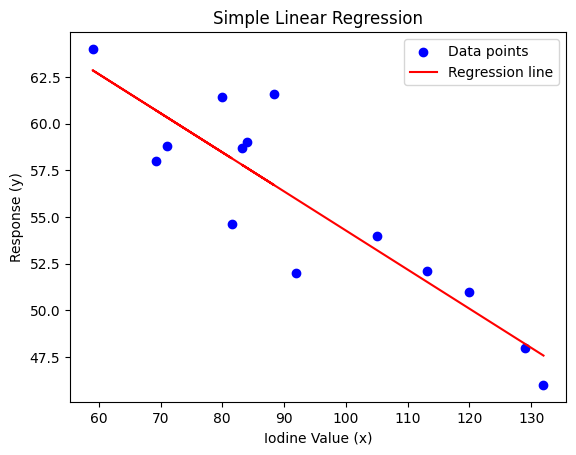

In [3]:
# Plot the data points and the regression line
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Regression line')
plt.xlabel('Iodine Value (x)')
plt.ylabel('Response (y)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()